# 06과 단변량분석 종합실습과제

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 배운 [파이썬 라이브러리 활용]과 [데이터 분석] 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|


In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop('Education', axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


### ① Sales (Target) 

In [3]:
sales = 'Sales'

1) 변수의 비즈니스 의미

> 각지역 판매액

2) 숫자, 범주?

> 숫자, 달러

3) NaN 존재 유무 및 조치방안

In [4]:
data[sales].isna().sum()

0

4) 가변수화 필요 여부

> 애초에 숫자형 데이터기 때문에 가변수화는 필요하지 않다.

5) 기초통계량(수치화)

In [7]:
data[sales].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

> 나 같은 경우에는 describe에서는 count와 mean과 50%의 차이를 주로 살피는 것 같다.

6) 분포 확인(시각화)

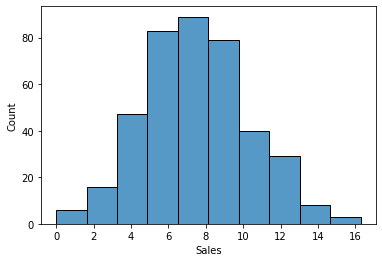

In [11]:
sns.histplot(data[sales], bins=10)
plt.show()

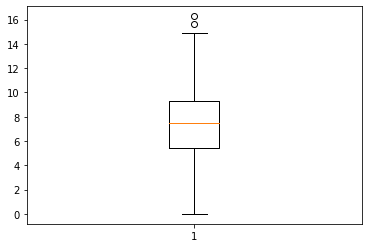

[5.39 0.  ]
[ 9.32 14.9 ]


In [10]:
box = plt.boxplot(data[sales])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 6~8000달러 부근이 대부분의 판매고 14.9 를 넘어가는 판매는 이상치로 볼 정도로 실적이 좋은 지역 같다. 


8) 추가 분석해 볼 사항이 있나요?

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|



14.9를 넘어갈정도로 실적이 좋은 회사는 왜 실적이 좋은지 체크.   
실적이 25% 대로 못온 5.39는 왜 실적이 낮은지    
compprice, advertising, price, age, urban 을 살펴봐야겠다.

### ② CompPrice

In [15]:
compprice = 'CompPrice'

1) 변수의 비즈니스 의미

> 경쟁사 가격 , 달러

2) 숫자, 범주?

숫자형 데이터 달러

In [13]:
data.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


3) NaN 존재 유무 및 조치방안

In [16]:
data[compprice].isna().sum()

0

4) 가변수화 필요 여부

> 숫자형 데이터여서 필요없다.

5) 기초통계량(수치화)

In [19]:
data[compprice].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

6) 분포 확인(시각화)

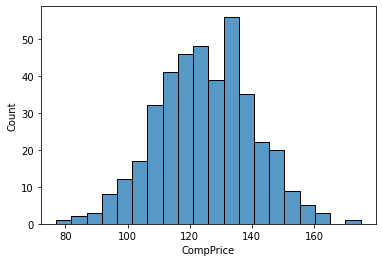

In [33]:
sns.histplot(data[compprice], bins=20)
plt.show()

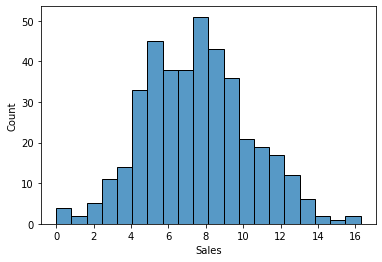

In [34]:
sns.histplot(data[sales],bins=20)
plt.show()

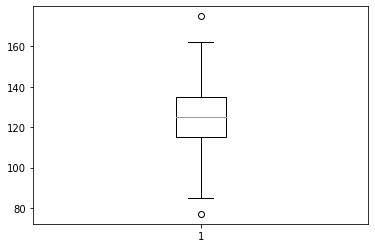

[115.  85.]
[135. 162.]


In [21]:
box = plt.boxplot(data[compprice])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

In [37]:
np.median(data[compprice])

125.0

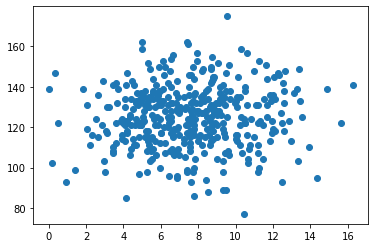

In [36]:
plt.scatter(data[sales], data[compprice])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> sales가 높은 지역의 경쟁사의 가격은 높긴하지만 경쟁사의 가격이 높은데에도 불구하고 sales가 낮은 지역이 있기 때문에 유의미한 의미는 없어 보인다... 
경쟁사의 가격을 보면 125달러 부근으로 형성되있다.

8) 추가 분석해 볼 사항이 있나요?

> compprice말고 price와 비교를 해봐야 겠다.  
> 경쟁사와 우리의 가격을 비교하고 거기에서 sales까지도 어떤지 확인 하는게 좋은데.. 어떻게 하지..?

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|

### ③ Income

In [38]:
income = 'Income'

1) 변수의 비즈니스 의미

> 지역 평균 소득  ( 단위 : 1000달러)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [40]:
data[income].isna().sum()

0

4) 가변수화 필요 여부

> 숫자형 데이터여서 가변수를 할 필요가 없다.

5) 기초통계량(수치화)

In [41]:
data[income].describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

6) 분포 확인(시각화)

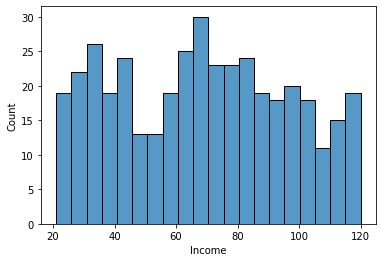

In [42]:
sns.histplot(data[income],bins=20)
plt.show()

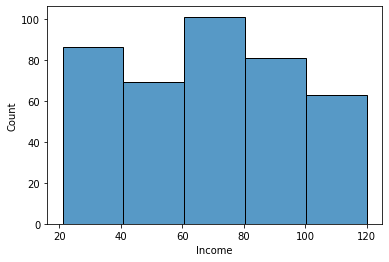

In [47]:
sns.histplot(data[income],bins=5)
plt.show()

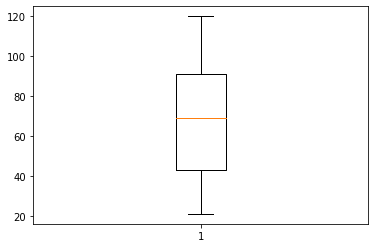

[42.75 21.  ]
[ 91. 120.]
69.0


In [43]:
box = plt.boxplot(data[income])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())
print(np.median(data[income]))

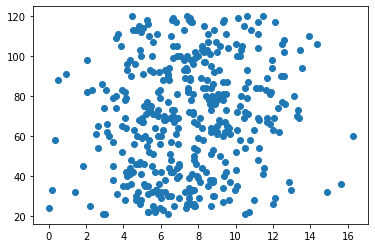

In [44]:
plt.scatter(data[sales], data[income])
plt.show()

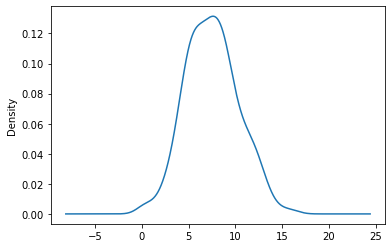

In [46]:
data[sales].plot(kind='kde')
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 특정구간[45~55] 이 부분이 급격하게 감소하지만 이 다음 구간이 가장 많이 측정되고 bins를 줄여서 그려보면 전체적으로 지역간 소득 인구 분포 차이가 심하지않다.

8) 추가 분석해 볼 사항이 있나요?

### ④ Advertising

In [48]:
advertising = 'Advertising'

1) 변수의 비즈니스 의미

> 각 지역 회사의 광고 예산 달러

2) 숫자, 범주?

> 숫자

1000 달러

3) NaN 존재 유무 및 조치방안

In [49]:
data[advertising].isna().sum()

0

4) 가변수화 필요 여부

> 없다

5) 기초통계량(수치화)

In [50]:
data[advertising].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

6) 분포 확인(시각화)

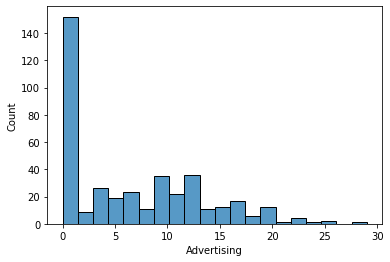

In [53]:
sns.histplot(data[advertising], bins=20)
plt.show()

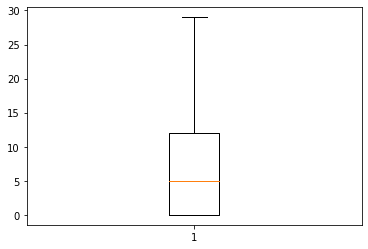

[0. 0.]
[12. 29.]


In [54]:
box_distance = plt.boxplot(data[advertising])
plt.show()

print(box_distance['whiskers'][0].get_ydata())
print(box_distance['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

1 부분이 압도적으로 많다. 광고예산에는 돈을 크게 투자하는 것 같진 않다. 12 까지는 쓰긴하지만 그 이상으로는 투자하는 것 같지 않다.

8) 추가 분석해 볼 사항이 있나요?

> 광고예산을 적게 투자한 부분의 실적과 적당히 투자한 부분의 실적  그리고 12 이상 부분의 투자한 곳의 실적을 살펴 보는것이 좋아보인다

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|

### ⑤ Population

In [55]:
population = 'Population'

1) 변수의 비즈니스 의미

> 지역인구수

2) 숫자, 범주?

>숫자

> 단위(1000명)

3) NaN 존재 유무 및 조치방안

In [58]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Urban          0
US             0
dtype: int64

> 모든 데이터에 결측치는 존재하지않는다.

4) 가변수화 필요 여부

> 숫자 데이터는 원핫 인코딩을 할 필요가 없다.

5) 기초통계량(수치화)

In [59]:
data[population].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

6) 분포 확인(시각화)

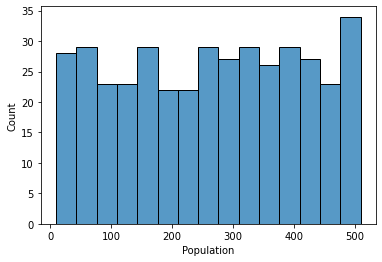

In [66]:
sns.histplot(data[population],bins=15)
plt.show()

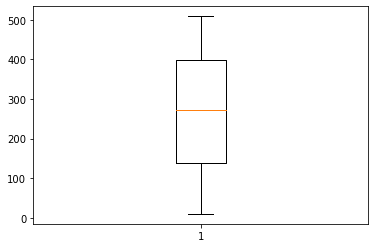

[139.  10.]
[398.5 509. ]


In [65]:
box_distance = plt.boxplot(data[population])
plt.show()

print(box_distance['whiskers'][0].get_ydata())
print(box_distance['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 인구수가 500만명 부근쪽에 사람이 가장 많이 카운팅 되었다. 

8) 추가 분석해 볼 사항이 있나요?

> 인구수가 적은 부분에는 사람이 sales가 어떻고 인구수가 많은 부분에 sales가 어떤지 살펴봐야한다.

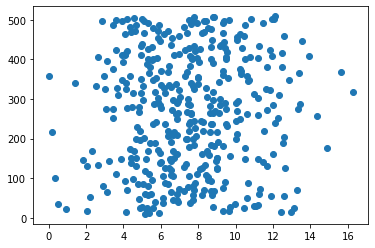

In [67]:
plt.scatter(data[sales], data[population])
plt.show()

### ⑥ Price

In [68]:
price = 'Price'

1) 변수의 비즈니스 의미

>지역별 판매가격


2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

> 이 데이터에는 결측치가 존재 하지 않는다.

4) 가변수화 필요 여부

> 숫자데이터는 필요없다.

5) 기초통계량(수치화)

In [71]:
data[price].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

6) 분포 확인(시각화)

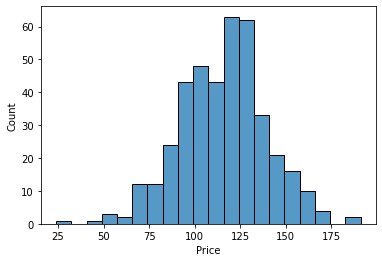

In [73]:
sns.histplot(data[price])
plt.show()

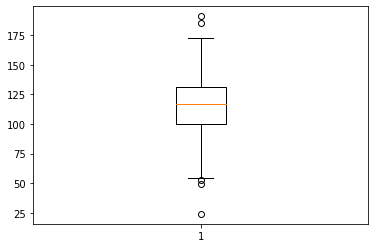

[100.  54.]
[131. 173.]


In [74]:
box_distance = plt.boxplot(data[price])
plt.show()

print(box_distance['whiskers'][0].get_ydata())
print(box_distance['whiskers'][1].get_ydata())

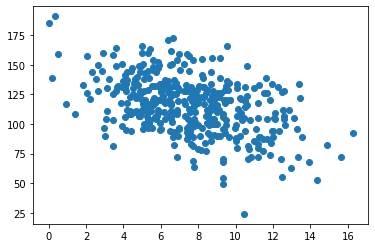

In [75]:
plt.scatter(data[sales],data[price])

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> scatter에서 원하는 그림이 드디어 나왔다. 반비례 모양으로 높은 가격을 보유한 지역은 매출이 아주 적고 매출이 높은 지역의 가격대는 상대적으로 낮은 가격을 유지했다. 아주 이상한 것은 매출이 11달러인 부분인데 여기는 가격이 아주 싼데도 불구하고 매출이 작다. 이런건 개수를 확인해서 가격이 너무 싸서 많이 팔렸는지 아니면 쓸모없는 데이터인지 확인해야할 것 같다.
> 이 pirce 자체의 의미로만 보면 117~130 구간으로 팔고 있다.

8) 추가 분석해 볼 사항이 있나요?

>54 달러 밑 173 달러 위 상품이 왜 이상치인지 어떤 상품인지 알아봐야 겠고 7번에서 이미 설명을 해서 넘어가겠다.

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|

### ⑦ ShelveLoc

In [77]:
shelve = 'ShelveLoc'

1) 변수의 비즈니스 의미

> 진열상태

2) 숫자, 범주?

In [78]:
data[shelve].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

> 범주형 데이터 (bad, good, medium)

3) NaN 존재 유무 및 조치방안

결측치는 어떠한 데이터도 없다.

4) 가변수화 필요 여부

In [79]:
pd.get_dummies(data[shelve], prefix = shelve)

,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
395,0,1,0
396,0,0,1
397,0,0,1
398,1,0,0


5) 기초통계량(수치화)

In [82]:
print(data[shelve].value_counts())
print(data[shelve].value_counts()/ len(data[shelve]))

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64


6) 분포 확인(시각화)

/opt/homebrew/Caskroom/miniforge/base/envs/tf26/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


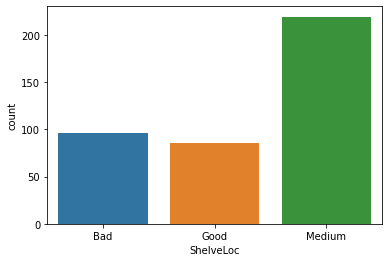

In [85]:
sns.countplot(data[shelve])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 진열상태가 평범한것이 대다수긴 하지만 가장큰 문제는 좋은 상태보다 아예 안좋은 상태가 더 많다는게 문제다. 진열을 고려해야한다.

8) 추가 분석해 볼 사항이 있나요?

> 진열이 나쁜것과 sales와의 관계를 살펴보고 왜 진열을 신경 안썼는지 찾아봐야한다.

### ⑧ Age

In [86]:
age = 'Age'

1) 변수의 비즈니스 의미

> 지역 인구의 연령

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

> 결측치는 없다

4) 가변수화 필요 여부

> 숫자는 가변수화가 필요없다.

5) 기초통계량(수치화)

In [88]:
data[age].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

6) 분포 확인(시각화)

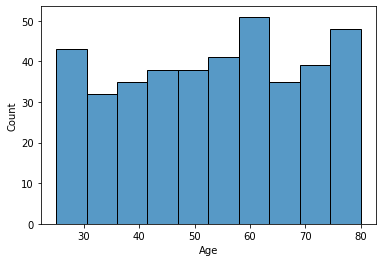

In [89]:
sns.histplot(data[age])
plt.show()

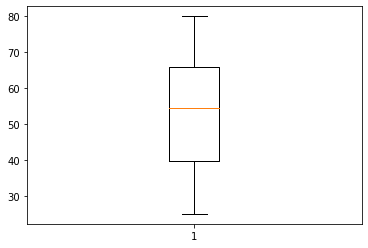

[39.75 25.  ]
[66. 80.]


In [90]:
box = plt.boxplot(data[age])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

인구 분포가 골고루 되어있다고 본다. 50중반의 수가 많긴하지만 30대전 나이대에도 사람이 많고 70대 소비자들도 많이 분포되있다고 본다

8) 추가 분석해 볼 사항이 있나요?

> 그래서 나이가 많은 인구의 sales를 확인해야한다. 지역인구수에 따라 인구의 분포도 확인해서 특정 지역이 어떤 상품이 주로 판매 되는지확인하자

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|

### ⑨ Urban

In [91]:
urban = 'Urban'

1) 변수의 비즈니스 의미

> 도심 지역 여부(0,1)

2) 숫자, 범주?

범주

In [92]:
data[urban].unique()

array(['Yes', 'No'], dtype=object)

3) NaN 존재 유무 및 조치방안

> nan 데이터는 없다.

4) 가변수화 필요 여부

In [93]:
np.where(data[urban] == 'Yes', 1 , 0)

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,

5) 기초통계량(수치화)

In [96]:
data[urban].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [97]:
print(data[urban].value_counts()/len(data[urban]))

Yes    0.705
No     0.295
Name: Urban, dtype: float64


6) 분포 확인(시각화)

/opt/homebrew/Caskroom/miniforge/base/envs/tf26/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


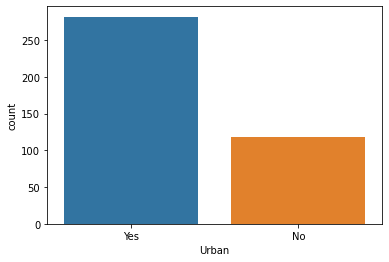

In [100]:
sns.countplot(data[urban])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 70퍼가 도심에 살고 있고 30퍼는 도심에 살지 않고 있다.

8) 추가 분석해 볼 사항이 있나요?

도심에 살지 않는 사람이어떤 물품을 사는지 또 매출이 어떤지   
이 반대도 생각을 해봐야 할 것 같다/

### ⑩ US

In [101]:
us = 'US'

1) 변수의 비즈니스 의미

매장이 미국에 있는지

2) 숫자, 범주?

범주

In [104]:
data[us].unique()

array(['Yes', 'No'], dtype=object)

3) NaN 존재 유무 및 조치방안

> 없다

4) 가변수화 필요 여부

In [ ]:
np.where(data[us] == 'Yes', 1 , 0)

5) 기초통계량(수치화)

In [108]:
data[us].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [109]:
print(data[us].value_counts()/len(data[us]))

Yes    0.645
No     0.355
Name: US, dtype: float64


6) 분포 확인(시각화)

/opt/homebrew/Caskroom/miniforge/base/envs/tf26/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


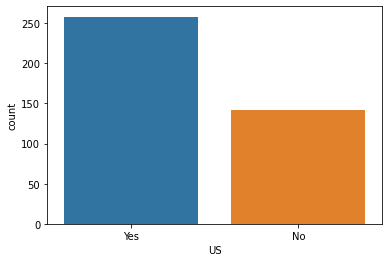

In [111]:
sns.countplot(data[us])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 64프로가 미국에 있다.

8) 추가 분석해 볼 사항이 있나요?

미국에 있을 때 sales와 아닐때의 sales를 잘 분석해야 할 것 같다.